# Assignment 2

## 2.1: Learning Rule for Perceptrons

In [1]:
import math
import numpy as np


def step(x):
    return (1.0 if x > 0.0 else 0.0)

# data matrix
X = np.matrix([[1.00, 0.00, 0.00], 
               [1.00, 0.00, 1.00], 
               [1.00, 1.00, 0.00], 
               [1.00, 1.00, 1.00]])

# target vector
y = np.matrix([[0], 
               [0], 
               [0], 
               [1]])

# parameter vector (initialized as 0.5)
w = np.matrix([[0.50], 
               [0.50], 
               [0.50]])

# number of epochs
num_epochs = 20

# learning rate
eta = 0.1

# non-vectorized implementation 
for e in range(0, num_epochs):
    
    print('Current parameter vector:')
    print(w)
    
    # number of mispredictions
    mp = 0
    
    # consider all data points (i. e., every row of X)
    for i in range(0, X.shape[0]):

        # compute prediction for this data point
        o = step(X[i,:]*w)
        t = y[i]
        mp += (0 if o==t else 1)   
    
        for j in range(0, w.shape[0]):
               w[j] = w[j] + eta*(t-o)*X[i,j]
                
    # break once all data points have been predicted correctly
    if (mp==0): 
        break    

Current parameter vector:
[[0.5]
 [0.5]
 [0.5]]
Current parameter vector:
[[0.2]
 [0.4]
 [0.4]]
Current parameter vector:
[[-0.1]
 [ 0.3]
 [ 0.3]]
Current parameter vector:
[[-0.3]
 [ 0.2]
 [ 0.2]]


## 2.4: Neural Networks as Universal Function Approximators

In the following example, we use a feed-forward neural network to approximate a given function. The example code is a modified version of the code provided ([here](https://machinelearningmastery.com/neural-networks-are-function-approximators/)). You can try approximating another function or modify the architecture of the neural network (e.g., swapping the activation function).

-50 50 2.0 2502.0
0.0 1.0 0.0 1.0000000000000002
MSE: 30205.688


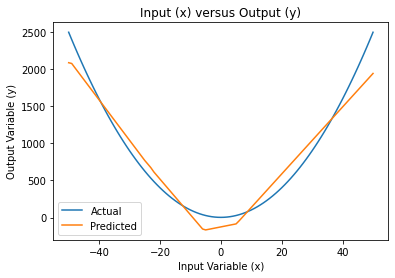

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
from math import sin

# function to approximate
def f(x):
    return 2.0 + x**2.0

# generate training data
xs = asarray([x for x in range(-50,51)])
ys = asarray([f(x) for x in xs])
print(xs.min(), xs.max(), ys.min(), ys.max())

# convert training data into matrices
xs = xs.reshape((len(xs), 1))
ys = ys.reshape((len(ys), 1))

# normalize training data
scale_x = MinMaxScaler()
xs = scale_x.fit_transform(xs)
scale_y = MinMaxScaler()
ys = scale_y.fit_transform(ys)
print(xs.min(), xs.max(), ys.min(), ys.max())

# architecture of neural network
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# loss function and approximation algorithm
model.compile(loss='mse', optimizer='sgd')

# ft the model
model.fit(xs, ys, epochs=500, batch_size=10, verbose=0)

# make predictions
yhat = model.predict(xs)

# inverse transforms
x_plot = scale_x.inverse_transform(xs)
y_plot = scale_y.inverse_transform(ys)
yhat_plot = scale_y.inverse_transform(yhat)

# print model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

# plot x vs y
pyplot.plot(x_plot,y_plot, label='Actual')

# plot x vs yhat
pyplot.plot(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()